In [1]:
import easyocr
import cv2
from matplotlib import pyplot as plt

In [2]:
image_path = "tax_invoice.png"

In [3]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(image_path)
result

Using CPU. Note: This module is much faster with a GPU.
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[([[np.int32(48), np.int32(70)],
   [np.int32(358), np.int32(70)],
   [np.int32(358), np.int32(126)],
   [np.int32(48), np.int32(126)]],
  'Tax Invoice',
  np.float64(0.8083380803702805)),
 ([[np.int32(793), np.int32(52)],
   [np.int32(1088), np.int32(52)],
   [np.int32(1088), np.int32(131)],
   [np.int32(793), np.int32(131)]],
  'TimeSite',
  np.float64(0.9967480334926905)),
 ([[np.int32(800), np.int32(129)],
   [np.int32(931), np.int32(129)],
   [np.int32(931), np.int32(156)],
   [np.int32(800), np.int32(156)]],
  'Timesheet, Billing',
  np.float64(0.8474248250240919)),
 ([[np.int32(958), np.int32(132)],
   [np.int32(1166), np.int32(132)],
   [np.int32(1166), np.int32(156)],
   [np.int32(958), np.int32(156)]],
  'Project Management System',
  np.float64(0.9197497517593937)),
 ([[np.int32(49), np.int32(168)],
   [np.int32(295), np.int32(168)],
   [np.int32(295), np.int32(208)],
   [np.int32(49), np.int32(208)]],
  'Amount Payable:',
  np.float64(0.9997828665079289)),
 ([[np.int32(437)

In [50]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
bottom_left = tuple(result[0][0][3])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

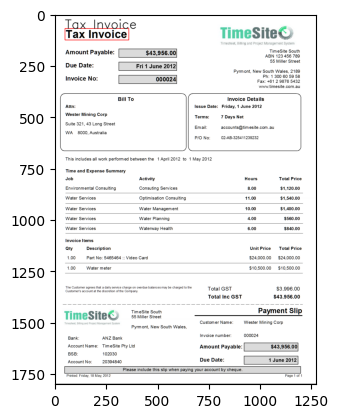

In [5]:
img = cv2.imread(image_path)
img = cv2.rectangle(img, top_left, bottom_right, (255, 0, 0), 2)
img = cv2.putText(img, text, top_left, font, 2, (0, 0, 0), 2, cv2.LINE_AA)
plt.imshow(img)
plt.show()

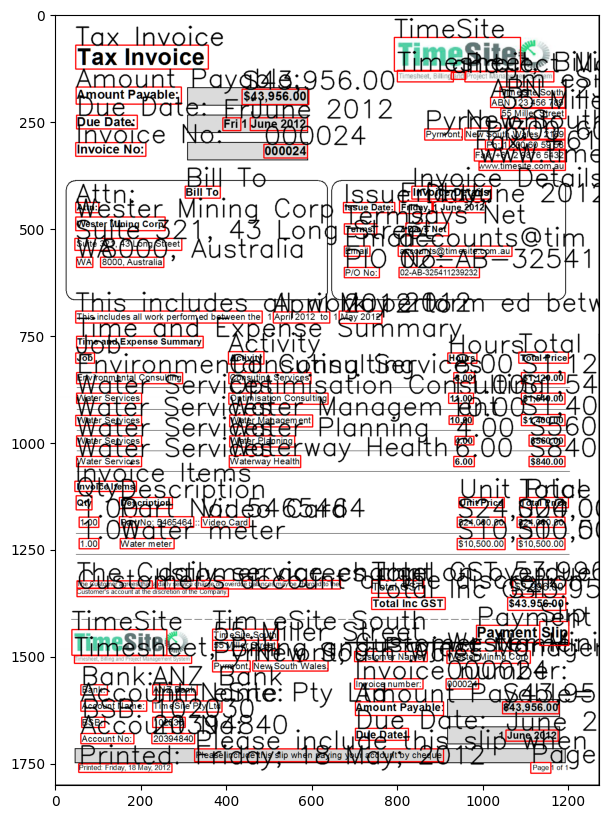

In [6]:
for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img, top_left, bottom_right, (255, 0, 0), 2)
    img = cv2.putText(img, text, top_left, font, 2, (0, 0, 0), 2, cv2.LINE_AA)
    
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

In [11]:
ctx = []
for i in range(len(result)):
    ctx.append(result[i][1])
    
ctx = ' '.join(ctx)
print(ctx)

Tax Invoice TimeSite Timesheet, Billing Project Management System Amount Payable: S43,956.00  Tim eSite South ABN 123 456 789 55 Miller Street Due Date: Fri June 2012 Pyrm ont; New South Wales, 2189 Ph: 300 60 59 58 Invoice No: 000024 Fax: +61 2 9876 5432 wwW.timesite com.au Bill To Invoice Details Attn: Issue Date: Friday, 1 June 2012 Wester Mining Corp Terms: Days Net Suite 321, 43 Long Street Email= accounts@tim esite.com .au WA 8000, Australia PIO No: 02-AB-325411239232 This includes all work perform ed between the April 2012 to May 2012 Time and Expense Summary Job Activity Hours Total Price Environmental Consulting Consuting Services 8.00 S1,120.00 Water Services Optimisation Consulting 11.00 S1,540.00 Water Services Water Managem ent 10.00 S1,400.00 Water Services Water Planning 4.00 S560.00 Water Services Waterway Health 6.00 S840.00 Invoice Items Description Unit Price Total Price 1.00 Part No: 5465464 Video Card S24,000.00 S24,000.00 1.00 Water meter S10,500.00 S10,500.00 The